# Double 7's (Short Term Trading Strategies that Work)

    1. The Security is above its 200-day moving average or X-day ma
    2. The Security closes at a 7-day low, buy.
    3. If the Security closes at a 7-day high, sell your long position.
    
    (Scale in and out of trades).
    
    'strategy.py' uses adjust_percent() approach
    'scaling_in_out.py' uses lower level pinkfish functions

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'
#symbol = 'NLY'

capital = 10000
#start = datetime.datetime(2015, 1, 1)
start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
# ************** IMPORT ONLY ONE OF THESE *************
import strategy
#import scaling_in_out as strategy

Run Strategy

In [5]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'stop_loss_pct' : 1.0,
    'margin' : 1,
    'period' : 7,
    'max_open_trades' : 4,
    'enable_scale_in' : True,
    'enable_scale_out' : True
}

s = strategy.Strategy(symbol, capital, start, end, options)
s.run()

View logs

In [6]:
s.rlog.head(50)

,date,seq_num,price,shares,entry_exit,direction,symbol
0,1993-11-19,0,46.31,53,entry,LONG,SPY
1,1993-11-22,1,46.03,53,entry,LONG,SPY
2,1993-12-02,2,46.53,55,exit,LONG,SPY
3,1993-12-03,3,46.72,51,exit,LONG,SPY
4,1993-12-14,4,46.53,53,entry,LONG,SPY
5,1993-12-15,5,46.47,55,entry,LONG,SPY
6,1993-12-21,6,46.47,54,entry,LONG,SPY
7,1993-12-22,7,46.78,55,exit,LONG,SPY
8,1993-12-27,8,47.00,54,exit,LONG,SPY
9,1993-12-28,9,47.09,53,exit,LONG,SPY


In [7]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
999,2021-02-26,380.36,2021-03-12,394.06,13.70,54.80,4,31961.20,LONG,SPY
1000,2021-02-26,380.36,2021-03-15,396.41,16.05,353.10,22,32314.30,LONG,SPY
1001,2021-03-04,376.70,2021-03-15,396.41,19.71,59.13,3,32373.43,LONG,SPY
1002,2021-03-19,389.48,2021-03-26,395.98,6.50,175.50,27,32548.93,LONG,SPY
1003,2021-03-24,387.52,2021-03-31,396.33,8.81,237.87,27,32786.80,LONG,SPY


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-03-26,42762.50,42597.26,42750.89,27,32059.43,1.00,X
2021-03-29,42771.68,42665.30,42745.49,27,32059.43,1.00,-
2021-03-30,42736.58,42670.97,42717.14,27,32059.43,1.00,-
2021-03-31,42786.80,42786.80,42786.80,0,42786.80,1.00,X
2021-04-01,42786.80,42786.80,42786.80,0,42786.80,1.00,-


Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [9]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end, use_adj=False)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

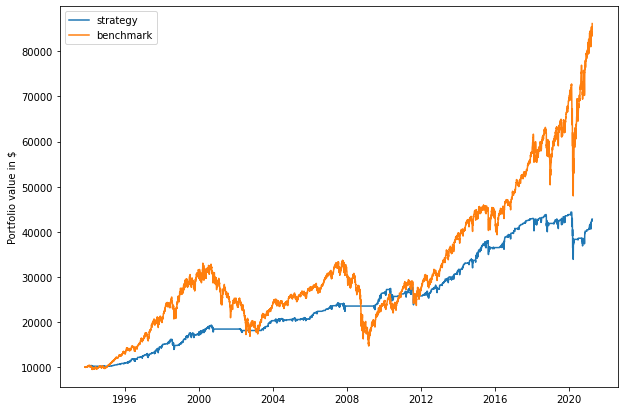

In [10]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

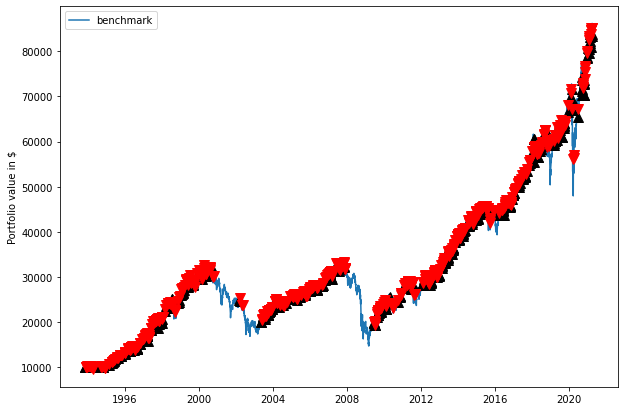

In [11]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,5.45,8.18
max_closed_out_drawdown,-23.62,-56.42
annualized_return_over_max_drawdown,0.23,0.14
best_month,13.10,23.06
worst_month,-22.99,-31.38
sharpe_ratio,0.65,0.51
sortino_ratio,0.49,0.65
monthly_std,1.90,4.52
annual_std,6.54,16.59


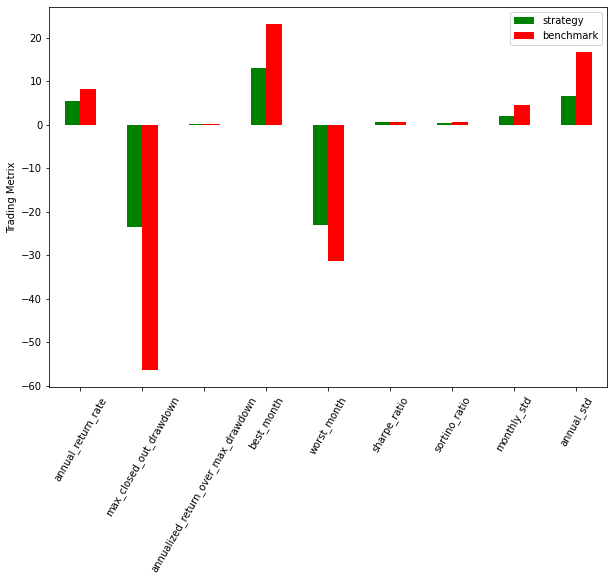

In [12]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Plot Instrument Risk vs Strategy Risk

,SPY,Strategy
avg,0.16,0.05
median,0.13,0.03
min,0.03,0.00
max,0.96,0.66
std,0.11,0.07
last,0.14,0.09


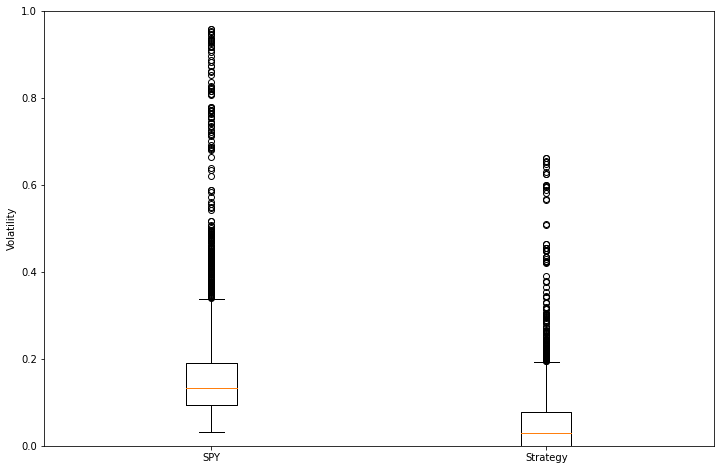

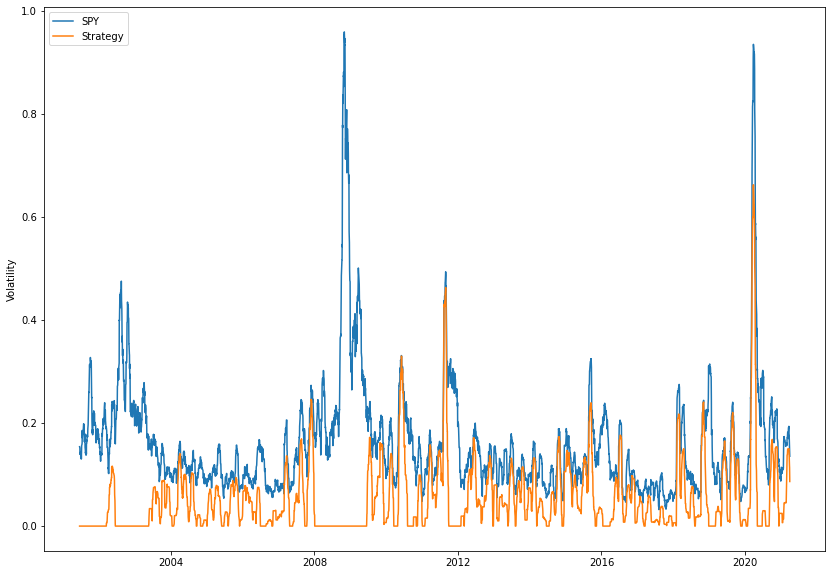

In [13]:
df = pf.volatility_graphs([s.ts, s.dbal], [symbol, 'Strategy'], points_to_plot=5000)
df

Prettier Graphs

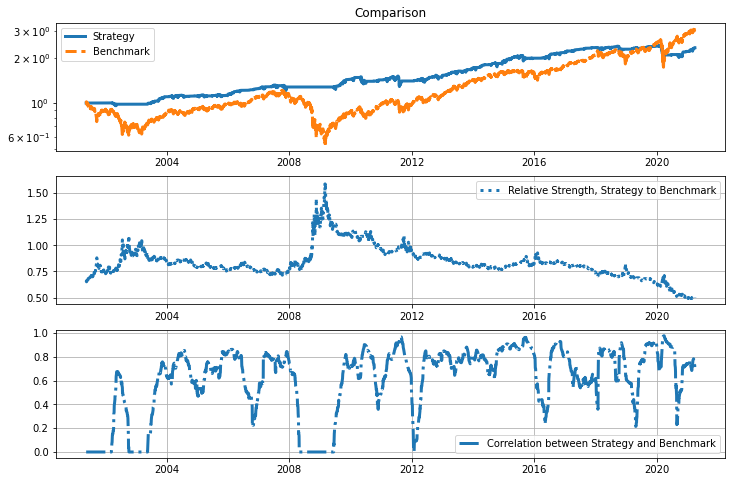

In [14]:
returns = s.dbal['close']
benchmark_returns = benchmark.dbal['close']
pf.prettier_graphs(returns, benchmark_returns, dbal_label='Strategy', benchmark_label='Benchmark', points_to_plot=5000)

In [15]:
pf.kelly_criterian(s.stats, benchmark.stats)

sharpe_ratio            0.65
sharpe_ratio_max        0.69
sharpe_ratio_min        0.61
strategy risk           0.07
instrument risk         0.17
optimal target risk     0.65
half kelly criterian    0.32
aggressive leverage     3.91
moderate leverage       1.96
conservative leverage   1.84
dtype: float64